<a href="https://colab.research.google.com/github/MissSamyuktha/Bank-Customer-Segmentation/blob/main/Bank_Customer_Segmentation_Based_On_CreditCard_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement
## Business Context
AllLife Bank plans to grow its credit card customer base by improving market penetration. The Marketing team will run personalized campaigns for new and existing customers, while the Operations team aims to enhance customer support by upgrading the service model. Both teams have sought help from the Data Science team to support these efforts.

## Objective
To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.

## Data Description
The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

Data Dictionary
- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

# Importing Libraries and Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to supress warnings
import warnings
warnings.filterwarnings('ignore')

In [41]:
# to perform t-SNE
from sklearn.manifold import TSNE

# to visualize 3D plot
import plotly.express as px

# to define a common seed value to be used throughout
RS=0

# Data Overview

In [3]:
# loading the data
df = pd.read_csv('/content/drive/MyDrive/PGP - AI ML/Machine Learning/Week 3 Clustering/AllLife Bank Customer Segmentation/Credit_Card.csv')

In [4]:
# Quick look on data
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
df.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


Data is loaded properly.

In [6]:
df.shape

(660, 7)

The dataset has 660 rows and 7 columns.

In [7]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


- The dataset has 660 entries having 7 features.
- No null values found.
- All the data is in numeric format, making it convinient for data analysis and running ML algorithm.

In [ ]:
# cross check for missing values
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


No data is missing.

In [8]:
# checking for duplicates
df.duplicated().sum()

np.int64(0)

There are no duplicate entries in the dataset to deal with.

In [11]:
# quick statistical summary of relevant data
df.drop(columns=['Sl_No', 'Customer Key']).describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


- There are no negative values found. Hence data accuracy is maintained.
- Data range is not extreme. Hence data is consistent with same units of measurements.

- Credit Limits are highly right skewed: The average credit limit is around 34,574, but the 50% falls under 18000, 75% under 48000 and the maximum goes up to 200,000, showing a wide disparity among customers. Most fall between 10,000 and 48,000.
- Credit card ownership is moderate: Customers typically hold 3–6 cards, with the median at 5. The maximum of 10 suggests a few heavy users.
- Bank visits are relatively low: Median visits are 2, with most customers visiting between 1–4 times. A small group never visits the bank at all.
- Online visits vary widely: While the median is 2, some customers make up to 15 online visits, indicating a segment that prefers digital interaction.
- Call activity is balanced but capped: Median calls are 3, with most customers making 1–5 calls. The maximum of 10 shows a few highly engaged customers.

# Exploratory Data Analysis

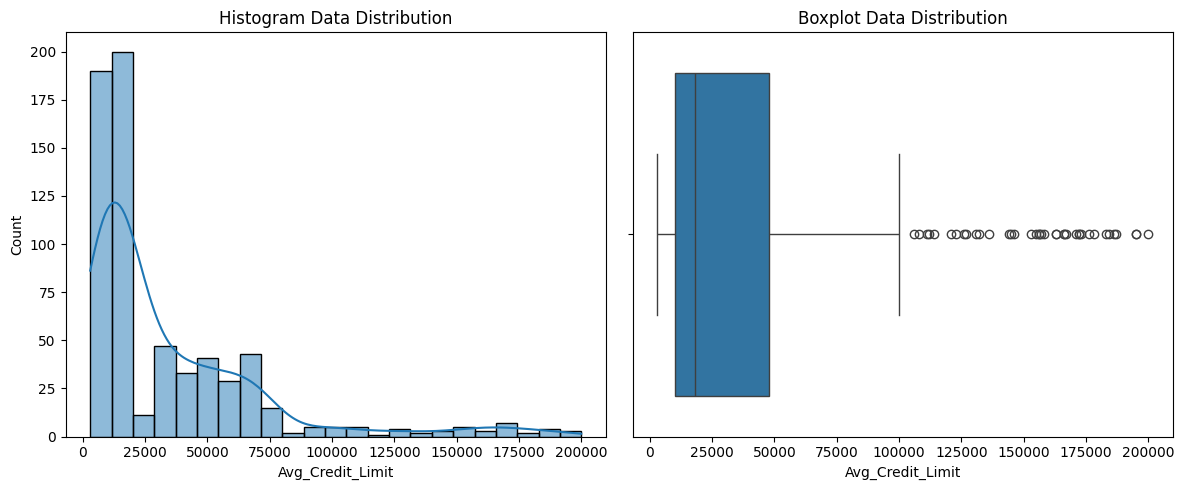

In [14]:
# Create a figure with two subplots side by side
fig, axes = plt.subplots(1,2,figsize=(12,5))

# Histogram plot
sns.histplot(data=df, x='Avg_Credit_Limit', kde=True, ax=axes[0])
axes[0].set_title("Histogram Data Distribution")

# Boxplot
sns.boxplot(data=df, x='Avg_Credit_Limit', ax=axes[1])
axes[1].set_title("Boxplot Data Distribution")

plt.tight_layout()
plt.show();

These plots together reveal that while the average credit limit is ₹34,574, the majority of customers have much lower limits, and a small elite group skews the average upward. This is a classic case of income or resource disparity in customer base.

Total_Credit_Cards
4     151
6     117
7     101
5      74
2      64
1      59
3      53
10     19
9      11
8      11
Name: count, dtype: int64


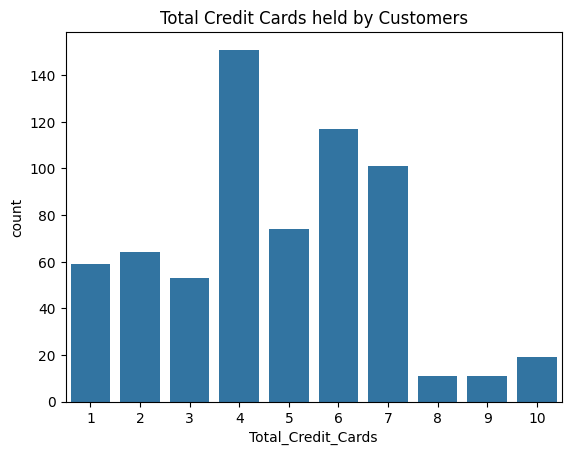

In [18]:
print(df['Total_Credit_Cards'].value_counts(sort=True, ascending=False))

sns.countplot(data=df, x='Total_Credit_Cards')
plt.title("Total Credit Cards held by Customers")
plt.show();

Most of the customers held total credit cards up to 7. Very few, most likely elite group held more than 7.

Total_visits_bank
2    158
1    112
0    100
3    100
5     98
4     92
Name: count, dtype: int64


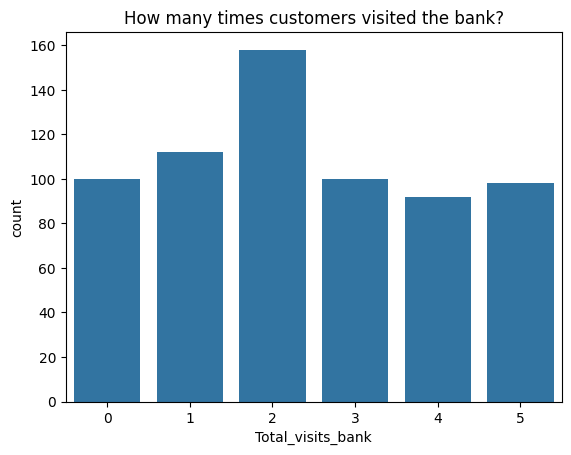

In [19]:
print(df['Total_visits_bank'].value_counts(sort=True, ascending=False))

sns.countplot(data=df, x='Total_visits_bank')
plt.title("How many times customers visited the bank?")
plt.show();

*Bank Visits*  
- Most customers visited the bank 2 times, making it the most common frequency.
- A notable group (~100 customers) never visited the bank.
- Limited people made more than 2 visits, suggesting limited in-person engagement.

Total_visits_online
2     189
0     144
1     109
4      69
5      54
3      44
15     10
7       7
10      6
12      6
8       6
11      5
13      5
9       4
14      1
6       1
Name: count, dtype: int64


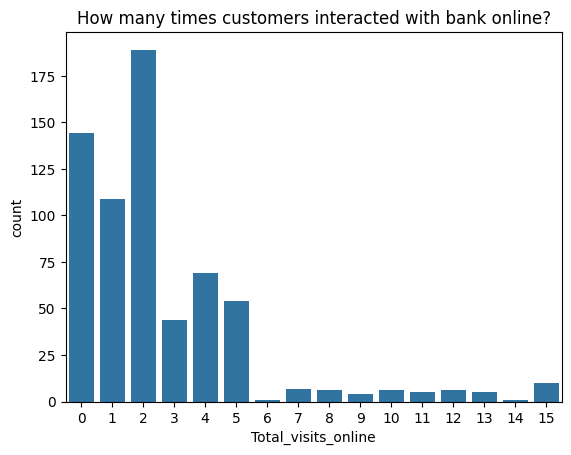

In [20]:
print(df['Total_visits_online'].value_counts(sort=True, ascending=False))

sns.countplot(data=df, x='Total_visits_online')
plt.title("How many times customers interacted with bank online?")
plt.show();

*Online Interactions*  
- Majority interacted online 2 times, followed by 0 and 1 times.
- Very few customers exceeded 6 online visits, indicating low digital engagement overall.
- A small segment (up to 15 visits) shows potential for a digital-first customer group.

Total_calls_made
4     108
0      97
2      91
1      90
3      83
6      39
7      35
9      32
8      30
5      29
10     26
Name: count, dtype: int64


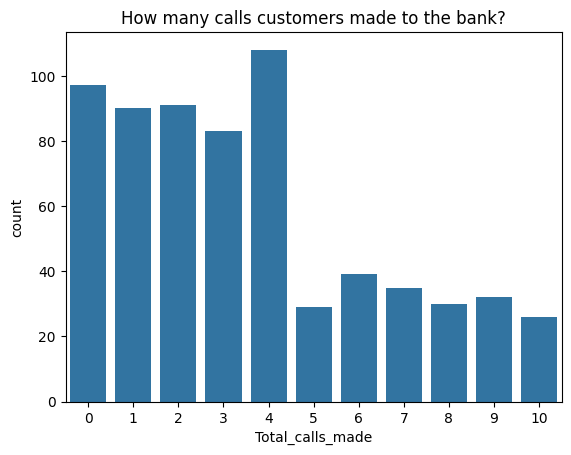

In [21]:
print(df['Total_calls_made'].value_counts(sort=True, ascending=False))

sns.countplot(data=df, x='Total_calls_made')
plt.title("How many calls customers made to the bank?")
plt.show();

*Calls Made*  
- Peak call frequency is 4 calls, followed by 0–2 calls.
- Engagement drops steadily after 4, with fewer customers making 6+ calls.
- Indicates moderate phone support usage, with a few highly active callers.

In [22]:
df.columns

Index(['Sl_No', 'Customer Key', 'Avg_Credit_Limit', 'Total_Credit_Cards',
       'Total_visits_bank', 'Total_visits_online', 'Total_calls_made'],
      dtype='object')

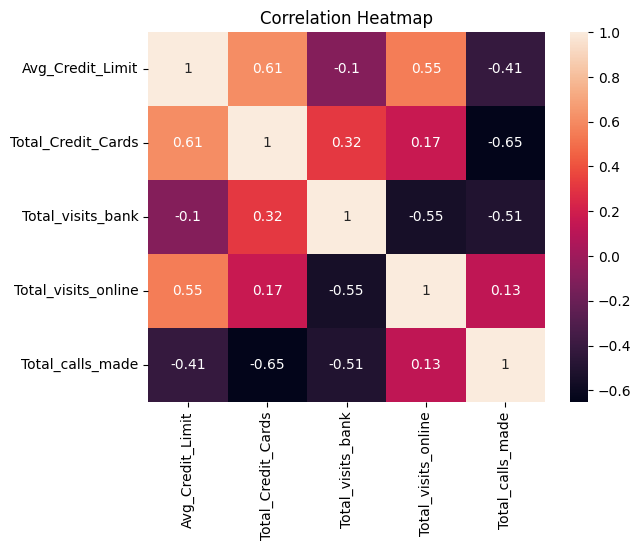

In [23]:
# correlation heatmap
sns.heatmap(df.drop(columns=['Sl_No', 'Customer Key']).corr(), annot=True)
plt.title("Correlation Heatmap");

*Key Relationships*  

*Avg_Credit_Limit & Total_Credit_Cards (0.61)*  
Strong positive correlation. Customers with more credit cards tend to have higher credit limits.

*Avg_Credit_Limit & Total_visits_online (0.55)*  
Moderate positive correlation. Customers with higher credit limits prefer digital engagement.

*Avg_Credit_Limit & Total_calls_made (-0.41)*  
Moderate negative correlation indicates frequent callers tend to have lower credit limits, possibly indicating service issues or lower-tier profiles.

*Total_Credit_Cards & Total_calls_made (-0.65)*  
Strong negative correlation. Customers with more cards make fewer calls, suggesting confidence or less need for support.

*Total_visits_bank & Total_visits_online (-0.55)*  
Clear inverse relationship indicates customers prefer either physical or digital channels, not both.

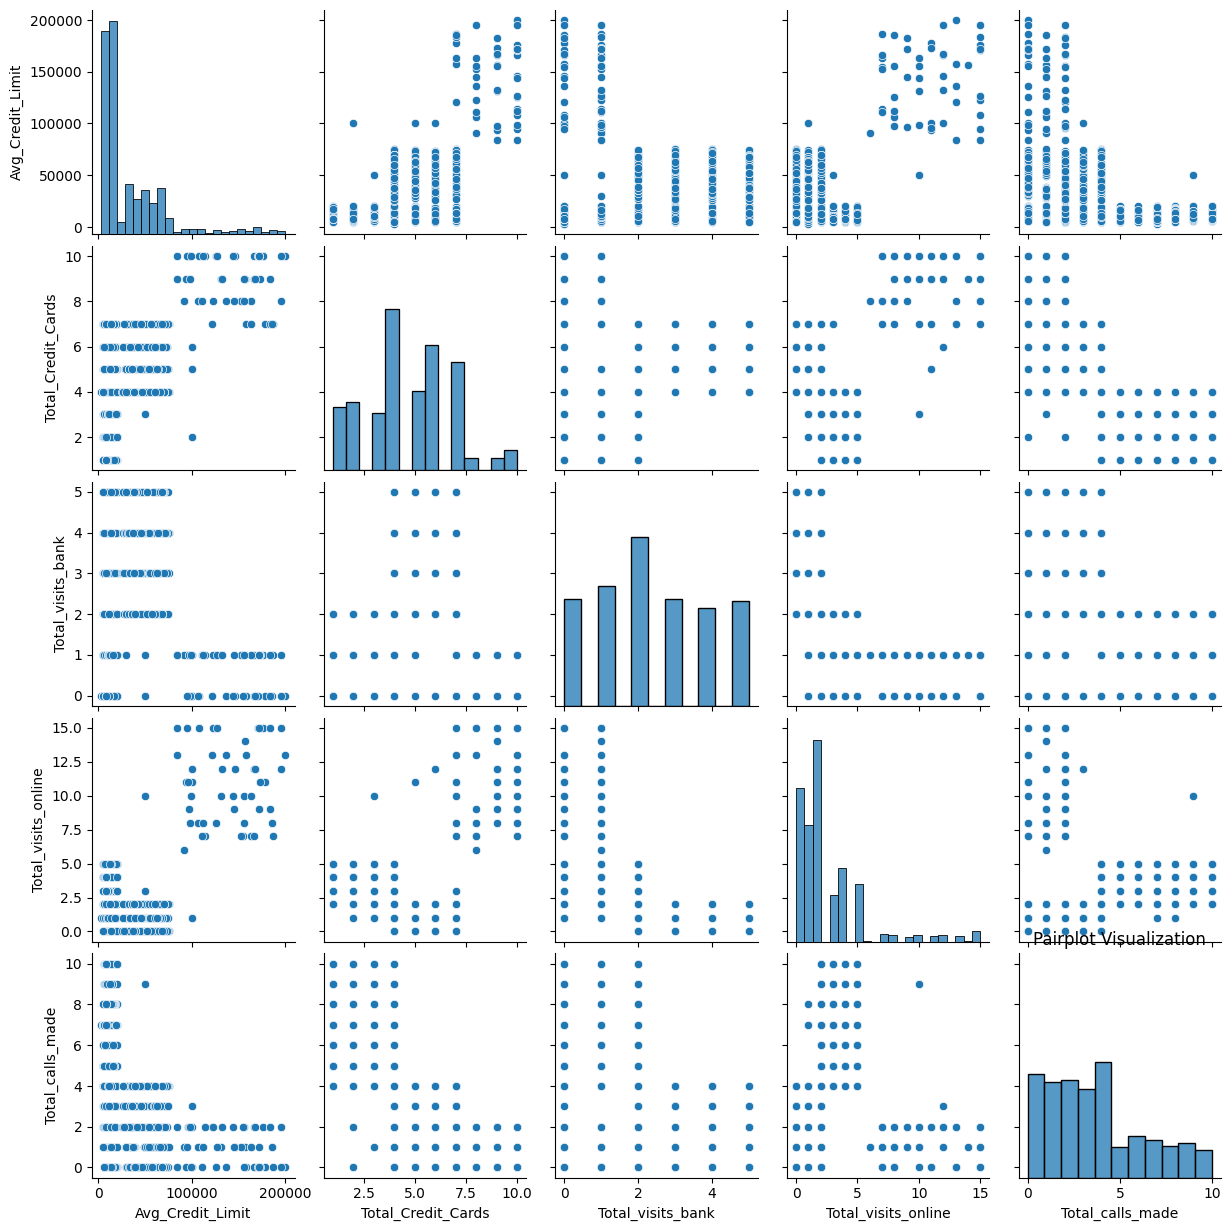

In [25]:
# pairplot
sns.pairplot(df.drop(columns=['Sl_No', 'Customer Key']))
plt.title("Pairplot Visualization");

This visualization confirms and reinforces the patterns seen in the correlation heatmap, and distribution plots.

# Data Preprocessing

Sl_No, Customer Key columns are just row indices and customer identifiers in the dataset and do not contribute to any decision making. Hence will be removed from model building.

In [27]:
# dropping unnecessary features
df_new = df.drop(columns=['Sl_No', 'Customer Key'])

## log Transformations
Avg_Credit_Limit data is highly right skewed. Let's apply log transformation and try to bring it to Guassian distribution.

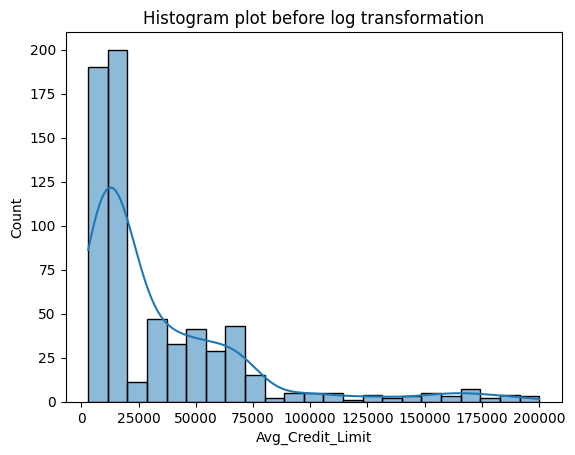

In [32]:
sns.histplot(data=df_new['Avg_Credit_Limit'], kde=True)
plt.title("Histogram plot before log transformation");

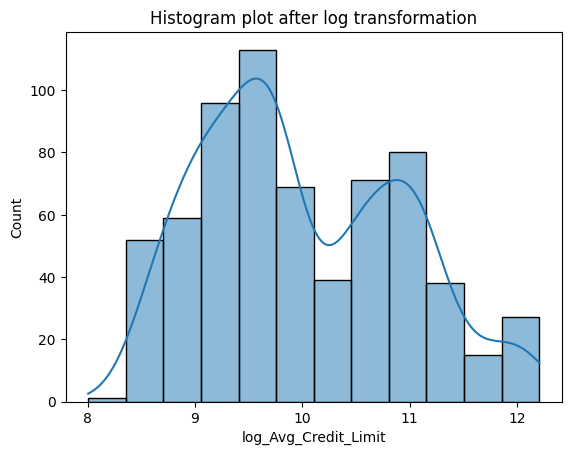

In [31]:
df_new['log_Avg_Credit_Limit'] = np.log(df_new['Avg_Credit_Limit'])
sns.histplot(data=df_new['log_Avg_Credit_Limit'], kde=True)
plt.title("Histogram plot after log transformation");

Log-transformed histogram of Avg_Credit_Limit now appears approximately Gaussian, the distribution appearing roughly symmetric, with reduced skewness.

In [33]:
df_log = df_new.drop(columns=['Avg_Credit_Limit'])
df_ori = df_new.drop(columns=['log_Avg_Credit_Limit'])

## Z-Score Scaling - StandardScaler

In [34]:
# scaling the data before clustering
scaler = StandardScaler()
log_scaled = scaler.fit_transform(df_log)

In [35]:
# creating a dataframe of the scaled data
df_log_scaled = pd.DataFrame(log_scaled, columns=df_log.columns)

## Dimensionality Reduction and Visualization using t-SNE

In [37]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(df_log_scaled)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

,Feature 1,Feature 2
0,-19.831470,3.928781
1,35.238873,17.416073
2,-31.716206,1.337621
3,-26.204424,5.718199
4,-5.851961,39.221321


In [38]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(df_log_scaled)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have two columns corresponding to the two reduced dimensions


tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3
0,-7.845745,2.706479,1.271292
1,12.143968,5.474970,-2.179921
2,-12.866035,1.754302,-2.041610
3,-12.893287,2.859995,1.398378
4,-1.362228,13.927046,-1.533668


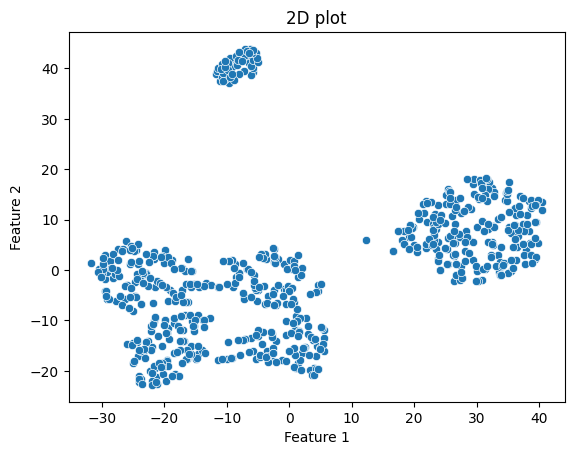

In [39]:
# 2D plot of data
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2")
plt.title("2D plot");

In [44]:
print("3D Plot")
fig = px.scatter_3d(tsne_3d_data, x="Feature 1", y="Feature 2", z="Feature 3");
fig.show()

3D Plot


We can roughly see there are 4 clusters in the data.

### Let's try out different values of perplexity.
### 2 Dimensions

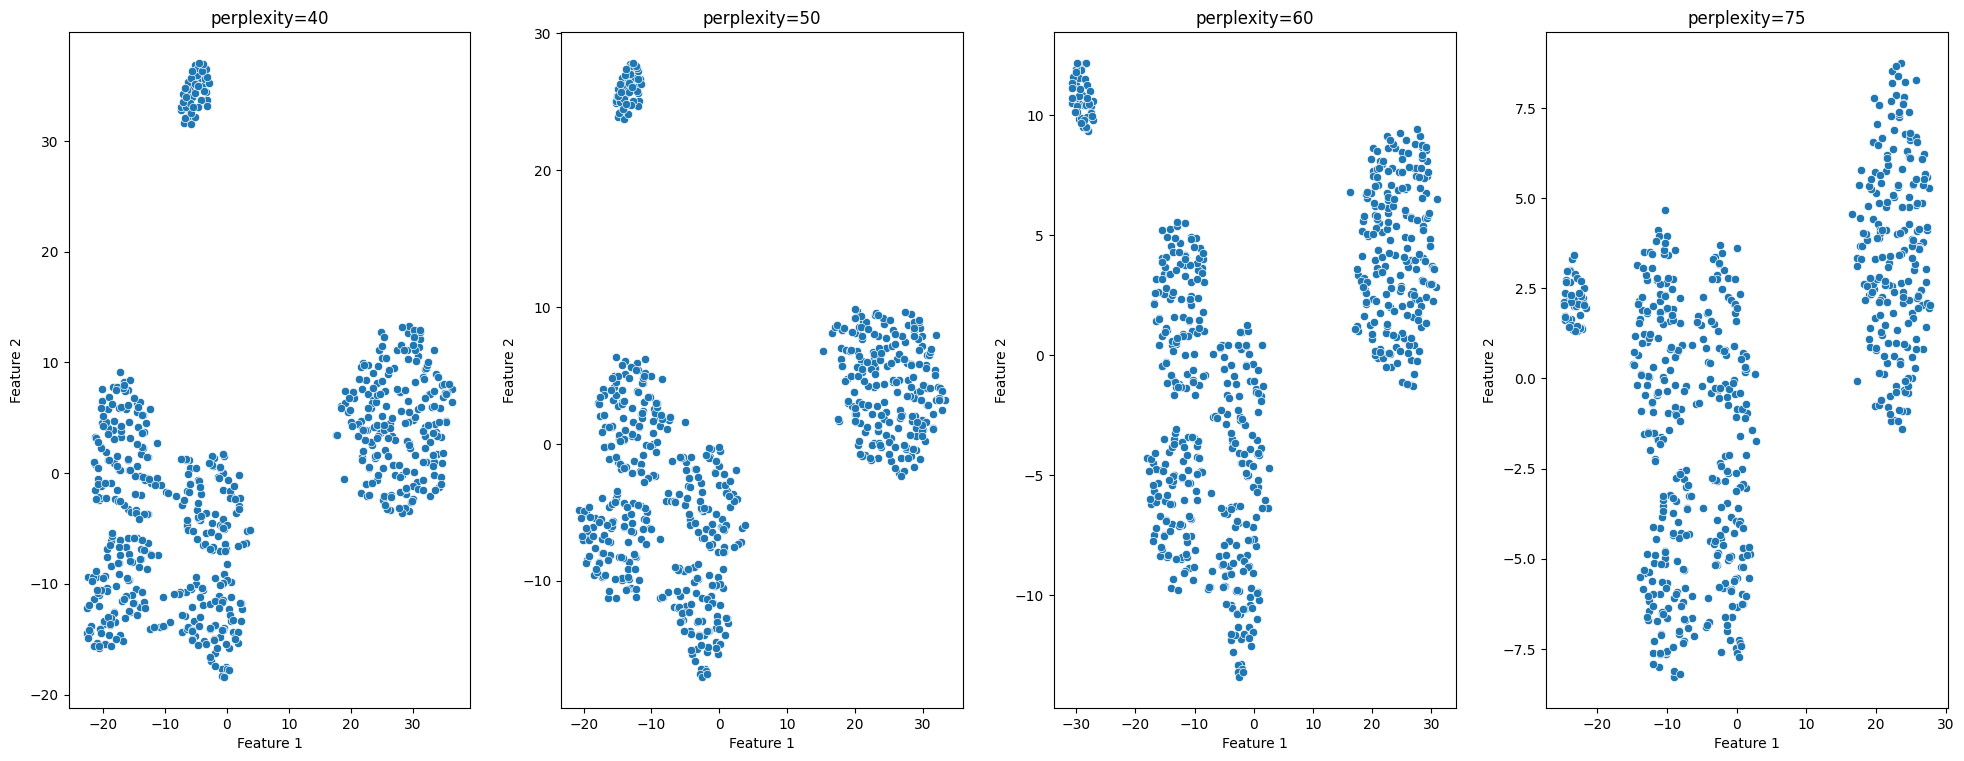

In [45]:
# Define the list of perplexity values to iterate over
perplexities = [40, 50, 60, 75]

plt.figure(figsize=(20, 15))

# Iterate over each perplexity value
for i in range(len(perplexities)):
    # Initiate TSNE with the current perplexity value
    tsne = TSNE(n_components=2, perplexity=perplexities[i], n_jobs=-2, random_state=RS)    # n_jobs specifies the nunmber of cores to use for parallel computation; -2 means use all but 1 core
    X_red = tsne.fit_transform(df_log_scaled)   # fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
    red_data_df = pd.DataFrame(data=X_red, columns=["Feature 1", "Feature 2"])    # creating a new dataframe with reduced dimensions

    # Adjust the subplot grid to 2x4
    plt.subplot(2, 4, i + 1)

    plt.title("perplexity=" + str(perplexities[i]))    # setting plot title
    sns.scatterplot(data=red_data_df, x="Feature 1", y="Feature 2")
    plt.tight_layout(pad=2)

plt.show()

- The data seems to exhibit a good visual separation for perplexity=50, and we can roughly see there are 3 or 4 clusters.
- For lower values of perplexity, the data seems to be sparse. This is because, t-SNE tries to preserve local structure and consider only a small neighbourhood.
- As we increase the perplexity, the data seems to be dense and it is converging to 3 clusters.
- We'll go ahead with the perplexity value of 50.

In [46]:
# Initiating the t-SNE object
# n_components=2 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one processor core for parallel computation, which speeds up the process
tsne = TSNE(n_components=2, perplexity=50, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the t-SNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(df_log_scaled)

# Creating a DataFrame from the reduced data
tsne_2d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2"])) # This DataFrame will have two columns corresponding to the two reduced dimensions
tsne_2d_data.head()

,Feature 1,Feature 2
0,-8.500523,4.733902
1,32.005280,7.972173
2,-15.240414,6.365423
3,-11.014297,6.231429
4,-11.893887,25.064018


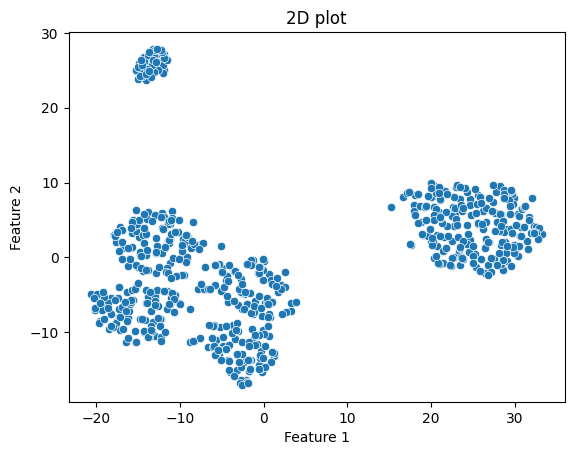

In [47]:
# 2D plot of data with perplexity=50
sns.scatterplot(data=tsne_2d_data, x="Feature 1", y="Feature 2")
plt.title("2D plot");

### 3 Dimensions with perplexity=50
We'll go ahead with perplexity=50

In [48]:
# Initiating the TSNE object and setting output dimension to 3
# n_components=3 specifies the number of dimensions to reduce the data to
# n_jobs=-2 specifies to use all but one core for parallel computation, which speeds up the process
tsne = TSNE(n_components=3, perplexity=50, n_jobs=-2, random_state=RS)

# Performing dimensionality reduction on the scaled data
# fit_transform() fits the TSNE model to the data and transforms it into the specified number of dimensions
tsne_reduced_data = tsne.fit_transform(df_log_scaled)

# Creating a DataFrame from the reduced data
tsne_3d_data = pd.DataFrame(tsne_reduced_data, columns=(["Feature 1","Feature 2","Feature 3"])) # This DataFrame will have three columns corresponding to the three reduced dimensions
tsne_3d_data.head()

,Feature 1,Feature 2,Feature 3
0,-7.489100,2.261039,-3.650289
1,11.772057,2.282521,-2.993077
2,-6.379844,2.952771,1.275800
3,-8.567891,3.464461,0.150431
4,-3.471433,10.402743,0.095142


In [50]:
# plotting a 3D scatterplot
print("3D plot with perplexity = 50")
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3')
fig.show()

3D plot with perplexity = 50


The data seems to exhibit a good visual separation for perplexity=50 in three dimensions too, and we can roughly see there are 3 or 4 clusters.

We can also try out a similar exercise of checking different values of perplexity for the 3-dimensional data found from t-SNE.

# Model Building

In [53]:
wcss = []
sil_scores = []
K = range(2,9)

for k in K:
  kmeans = KMeans(n_clusters=k, random_state=RS)
  #kmeans.fit(df_log_scaled)
  #cluster_labels_predicted = kmeans.predict(df_log_scaled)
  cluster_labels_predicted = kmeans.fit_predict(df_log_scaled)

  wcss_k = kmeans.inertia_
  sil_score_k = silhouette_score(df_log_scaled, cluster_labels_predicted)

  wcss.append(wcss_k)
  sil_scores.append(sil_score_k)


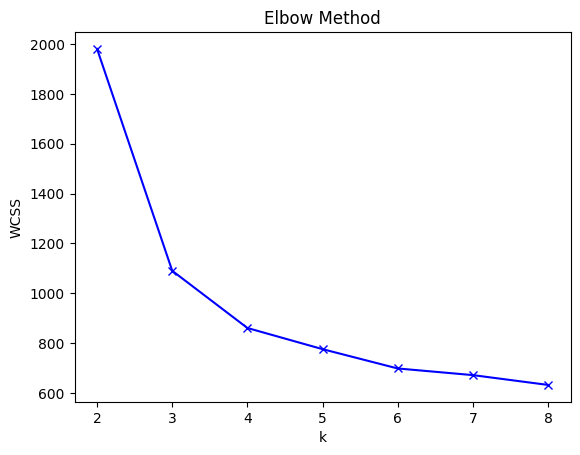

In [57]:
# Elbow Plot
plt.plot(K, wcss, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

The appropriate value of k from the Elbow curve seems to be 3 or 4.

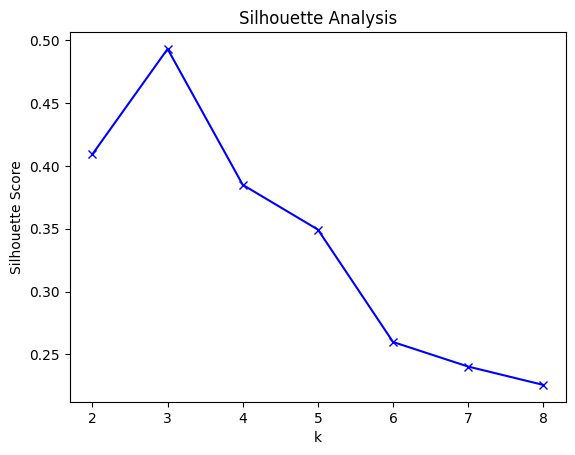

In [59]:
# Silhouette Plot
plt.plot(K, sil_scores, 'bx-')
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis")
plt.show()

The silhouette coefficient for 3 clusters is the highest.
We'll go ahead with K=3.

In [60]:
kmeans = KMeans(n_clusters=3, random_state=RS)
df['Cluster'] = kmeans.fit_predict(df_log_scaled)

In [61]:
df['Cluster'].head()

,Cluster
0,0
1,1
2,0
3,0
4,2


# Visualizing Final Clusters

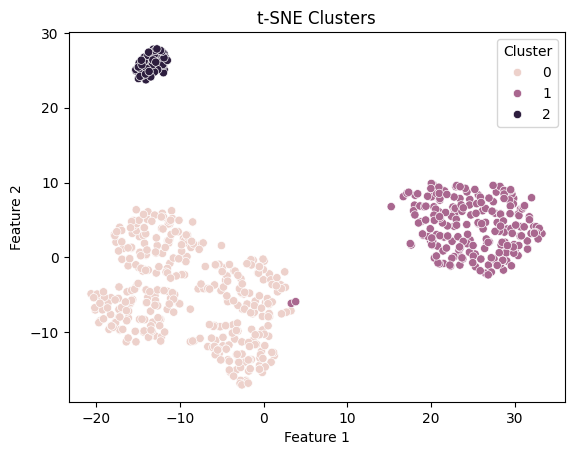

In [62]:
sns.scatterplot(data=tsne_2d_data, x='Feature 1', y='Feature 2', hue=df['Cluster'])
plt.title('t-SNE Clusters')
plt.show()


In [63]:
# visualizing the final cluster using t-SNE 3D
# plotting a 3D scatterplot
fig = px.scatter_3d(tsne_3d_data, x='Feature 1', y='Feature 2', z='Feature 3',color=df['Cluster'])
fig.show()

# Cluster Profiling

In [66]:
data = df.drop(columns=['Sl_No', 'Customer Key'])

In [67]:
cluster_profile = data.groupby('Cluster').mean()
cluster_profile


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Cluster,,,,,
0,33851.948052,5.516883,3.493506,0.979221,1.994805
1,12151.111111,2.422222,0.937778,3.546667,6.857778
2,141040.000000,8.740000,0.600000,10.900000,1.080000


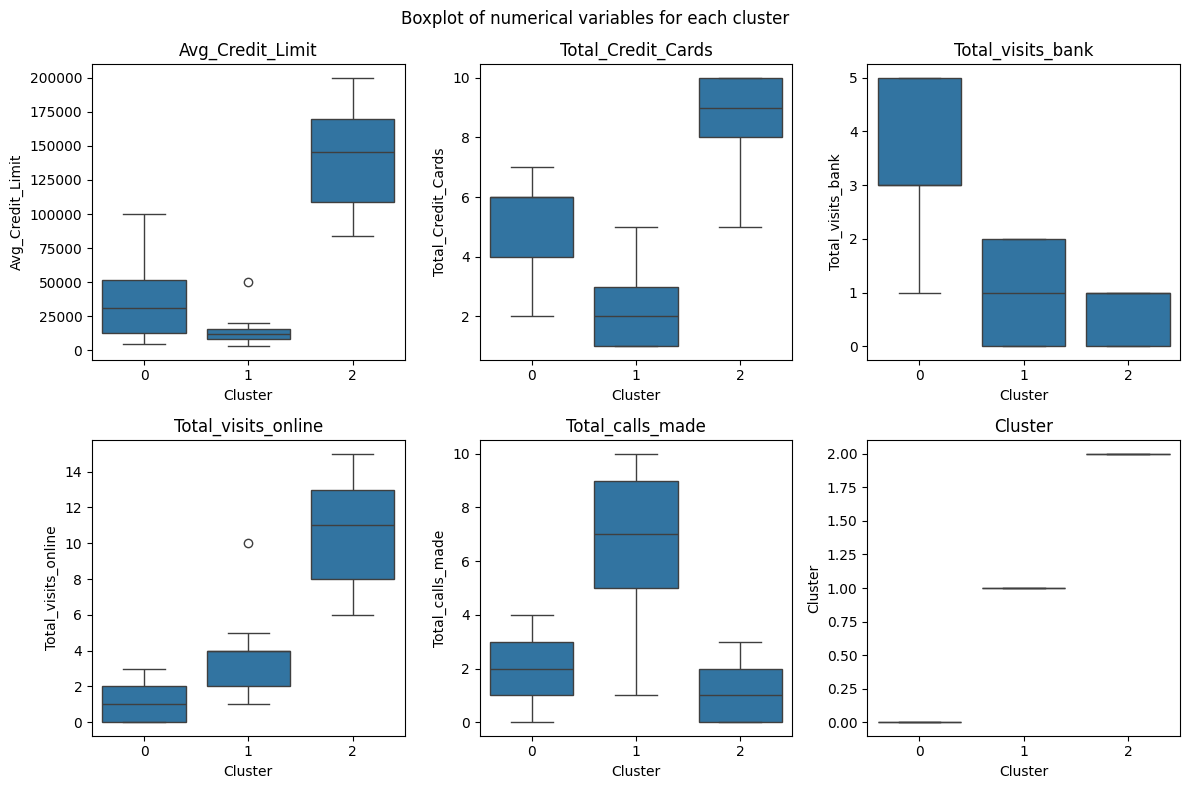

In [69]:
# Create 2x3 subplot grid
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
fig.suptitle("Boxplot of numerical variables for each cluster")

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature as a boxplot
for i, feature in enumerate(data.columns):
    sns.boxplot(ax=axes[i], x=df['Cluster'], y=df[feature])
    axes[i].set_title(feature)

# Adjust layout
plt.tight_layout()
plt.show()

In [71]:
df.drop(columns=['Sl_No', 'Customer Key']).groupby('Cluster').describe().T

Cluster                                0             1              2
Avg_Credit_Limit    count     385.000000    225.000000      50.000000
                    mean    33851.948052  12151.111111  141040.000000
                    std     22156.084628   5248.665741   34457.877272
                    min      5000.000000   3000.000000   84000.000000
                    25%     13000.000000   8000.000000  108750.000000
                    50%     31000.000000  12000.000000  145500.000000
                    75%     52000.000000  16000.000000  170000.000000
                    max    100000.000000  50000.000000  200000.000000
Total_Credit_Cards  count     385.000000    225.000000      50.000000
                    mean        5.516883      2.422222       8.740000
                    std         1.141249      1.111805       1.274715
                    min         2.000000      1.000000       5.000000
                    25%         4.000000      1.000000       8.000000
                    50%         6.000000      2.000000       9.000000
                    75%         6.000000      3.000000      10.000000
                    max         7.000000      5.000000      10.000000
Total_visits_bank   count     385.000000    225.000000      50.000000
                    mean        3.493506      0.937778       0.600000
                    std         1.134490      0.804920       0.494872
                    min         1.000000      0.000000       0.000000
                    25%         3.000000      0.000000       0.000000
                    50%         3.000000      1.000000       1.000000
                    75%         5.000000      2.000000       1.000000
                    max         5.000000      2.000000       1.000000
Total_visits_online count     385.000000    225.000000      50.000000
                    mean        0.979221      3.546667      10.900000
                    std         0.856704      1.220656       2.880264
                    min         0.000000      1.000000       6.000000
                    25%         0.000000      2.000000       8.000000
                    50%         1.000000      4.000000      11.000000
                    75%         2.000000      4.000000      13.000000
                    max         3.000000     10.000000      15.000000
Total_calls_made    count     385.000000    225.000000      50.000000
                    mean        1.994805      6.857778       1.080000
                    std         1.428860      1.994914       0.876915
                    min         0.000000      1.000000       0.000000
                    25%         1.000000      5.000000       0.000000
                    50%         2.000000      7.000000       1.000000
                    75%         3.000000      9.000000       2.000000
                    max         4.000000     10.000000       3.000000

#Key Insights

**Cluster 0 – Mid-tier, branch-oriented**
- Avg Credit Limit ≈ ₹33,852 (moderate)
- Cards ≈ 5.5 (healthy ownership)
- Bank visits ≈ 3.5 (highest among clusters → branch-heavy engagement)
- Online visits ≈ 1 (low digital usage)
- Calls ≈ 2 (moderate support usage)
- Contains a relatively large number of customers (385)
- Profile: Traditional customers, moderate credit, prefer in-person banking.

**Cluster 1 – Low-limit, support-heavy**
- Avg Credit Limit ≈ ₹12,151 (lowest)
- Cards ≈ 2.4 (few cards)
- Bank visits ≈ 0.9 (rarely visit branch)
- Online visits ≈ 3.5 (moderate digital usage)
- Calls ≈ 6.9 (highest → heavy reliance on phone support)
- Contains a moderate number of customers (225)
- Profile: Lower-value customers, digitally moderate, but high service dependency (likely pain points or issues).

**Cluster 2 – Elite, digital-first**  
- Avg Credit Limit ≈ ₹141,040 (very high)
- Cards ≈ 8.7 (many cards)
- Bank visits ≈ 0.6 (rarely visit branch)
- Online visits ≈ 10.9 (highest → digital-first)
- Calls ≈ 1.1 (low support usage)
- Contains a small number of elite customers (50)
- Profile: High-value elites, prefer digital channels, low support needs.

*Boxplot Insights*

Credit Limit: Cluster 2 is tightly grouped at high values — clear elite segment.

Visits & Calls: Cluster 1 shows wide spread in calls, indicating inconsistent service needs.

Online vs. Bank Visits: Clusters 0 and 2 show opposite preferences — physical vs. digital.

# Business Recommenations

**Cluster 0 – Mid-tier Branch Loyalists**
Traditional customers who prefer in-person banking and hold multiple cards.
- Promote digital onboarding and app usage.
- Offer bundled services at branches (e.g., insurance + credit upgrades).
- Target with hybrid campaigns (SMS + in-branch offers).

**Cluster 1 – Mass Market Support-Heavy**
Low-value customers with high support needs — possibly confused or underserved.
- Improve call center efficiency (IVR, chatbot, FAQs).
- Launch credit-builder programs and financial literacy campaigns.
- Incentivize digital self-service (e.g., waive fees for app usage).

**Cluster 2 – Digital Elites**
High-value, low-touch customers who prefer digital channels.
- Offer premium digital perks (priority support, exclusive offers).
- Introduce loyalty rewards and invite-only events.
- Expand app features and personalized dashboards.

**Strategic Takeaways**

Focus marketing on Cluster 0 for volume growth and digital migration.

Prioritize operational upgrades for Cluster 1 to reduce support load.

Protect and nurture Cluster 2 with premium digital experiences.

# Aditional Info
**Dive deeper into cluster details from statistical summary**

Interpretation and recommendations are same just more details as to why we came at particular interpretation and gave those business recommendations


**Cluster 0 – Mid-tier Branch Loyalists (≈58.5%)**  
*Credit Limit:*  
- Mean ₹33.8k, spread from ₹5k to ₹100k
- Wide range, std ≈ ₹22k → diverse financial capacity

*Cards:* Median 6, tightly grouped (min 2, max 7)

*Bank Visits:* Median 3, max 5 → consistent branch engagement

*Online Visits:* Median 1, max 3 → low digital usage

*Calls:* Median 2, max 4 → moderate support needs

**Interpretation:** Traditional, moderately affluent customers with strong branch loyalty


**Cluster 1 – Mass Market Support-Heavy (≈34%)**  
*Credit Limit:* Mean ₹12.1k, max ₹50k, std ≈ ₹5.2k → low-value segment

*Cards:* Median 2, max 5 → limited product engagement

*Bank Visits:* Median 1, many at 0 → low physical engagement

*Online Visits:* Median 4, max 10 → moderate digital usage

*Calls:* Median 7, max 10 → high support dependency

**Interpretation:** Underserved, low-value customers with frequent service needs


**Cluster 2 – Digital Elites (≈7.5%)**  
*Credit Limit:* Mean ₹141k, tightly grouped (min ₹84k, max ₹200k), std ≈ ₹34k

*Cards:* Median 9, max 10 → high product engagement

*Bank Visits:* Median 1, most at 0 → minimal physical interaction

*Online Visits:* Median 11, max 15 → very high digital engagement

*Calls:* Median 1, max 3 → low support needs

**Interpretation:** High-value, low-touch digital-first customers.